# Uber pickups
#### By : Ghizlane DAOUDI - dsmft-paris-14

## Part I : EDA

### 1. Import useful Libraries

In [1]:
import pandas as pd
import numpy as np
from math import *
from sklearn.preprocessing import  StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import  silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt 
! pip install plotly -q
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "iframe_connected"

import warnings
warnings.filterwarnings("ignore")

### 2. Import the dataset

In [2]:
dataset_original = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-apr14.csv")

In [3]:
# dataset_original.to_csv('src/uber_apr14')

### 3. Basic exploration 

In [3]:
dataset_original.shape

(564516, 4)

In [4]:
dataset_original.describe(include='all')

,Date/Time,Lat,Lon,Base
count,564516,564516.000000,564516.000000,564516
unique,41999,NaN,NaN,5
top,4/7/2014 20:21:00,NaN,NaN,B02682
freq,97,NaN,NaN,227808
mean,NaN,40.740005,-73.976817,NaN
std,NaN,0.036083,0.050426,NaN
min,NaN,40.072900,-74.773300,NaN
25%,NaN,40.722500,-73.997700,NaN
50%,NaN,40.742500,-73.984800,NaN
75%,NaN,40.760700,-73.970000,NaN


In [5]:
dataset_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [6]:
type(dataset_original['Date/Time'][0])

str

In [7]:
dataset_original['Date/Time'][0]

'4/1/2014 0:11:00'

### 4. Cleaning the dataset

In [8]:
# Converting the the 'Date/Time' values into timestamp values
dataset_original['Date/Time']=pd.to_datetime(dataset_original['Date/Time'])

In [9]:
dataset_original.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [10]:
type(dataset_original['Date/Time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
dataset = dataset_original

dataset['day_of_week']=dataset['Date/Time'].dt.dayofweek
dataset['hour']=dataset['Date/Time'].dt.hour
#dataset['interval']=dataset['hour'].apply(lambda x : '[{}h - {}h]'.format(2*floor(x/2),2*(floor(x/2)+1)))
#dataset['day_night']=dataset['hour'].apply(lambda x : 'night' if (x>20 and x<6) else 'day')

dataset = dataset.drop(['Date/Time'],axis=1)

In [12]:
dataset.head()

,Lat,Lon,Base,day_of_week,hour
0,40.7690,-73.9549,B02512,1,0
1,40.7267,-74.0345,B02512,1,0
2,40.7316,-73.9873,B02512,1,0
3,40.7588,-73.9776,B02512,1,0
4,40.7594,-73.9722,B02512,1,0


In [13]:
dataset.describe(include='all')

,Lat,Lon,Base,day_of_week,hour
count,564516.000000,564516.000000,564516,564516.00000,564516.000000
unique,NaN,NaN,5,NaN,NaN
top,NaN,NaN,B02682,NaN,NaN
freq,NaN,NaN,227808,NaN,NaN
mean,40.740005,-73.976817,NaN,2.86698,14.465043
std,0.036083,0.050426,NaN,1.82081,5.873925
min,40.072900,-74.773300,NaN,0.00000,0.000000
25%,40.722500,-73.997700,NaN,1.00000,10.000000
50%,40.742500,-73.984800,NaN,3.00000,16.000000
75%,40.760700,-73.970000,NaN,4.00000,19.000000


In [14]:
dataset.drop('Base',axis=1,inplace=True)

In [15]:
dataset_apr = dataset

In [16]:
dataset = dataset_apr.sample(50000, random_state=0)

In [17]:
#Check of missing values share
print(100*dataset.isna().sum()/dataset.shape[0])

Lat            0.0
Lon            0.0
day_of_week    0.0
hour           0.0
dtype: float64


### 5. Visualizations

In [18]:
# Distribution of variables

features = ["day_of_week", "hour"]
fig = make_subplots(rows = len(features), cols = 1, subplot_titles = features)
for i in range(len(features)):
    fig.add_trace(
        go.Histogram(
            x = dataset[features[i]], nbinsx = 50),
        row = i + 1,
        col = 1)
fig.update_layout(
        title = go.layout.Title(text = "Distribution of variables", x = 0.5), showlegend = False, 
            autosize=True, height=1000)
fig.show()

In [19]:
dict_days= {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

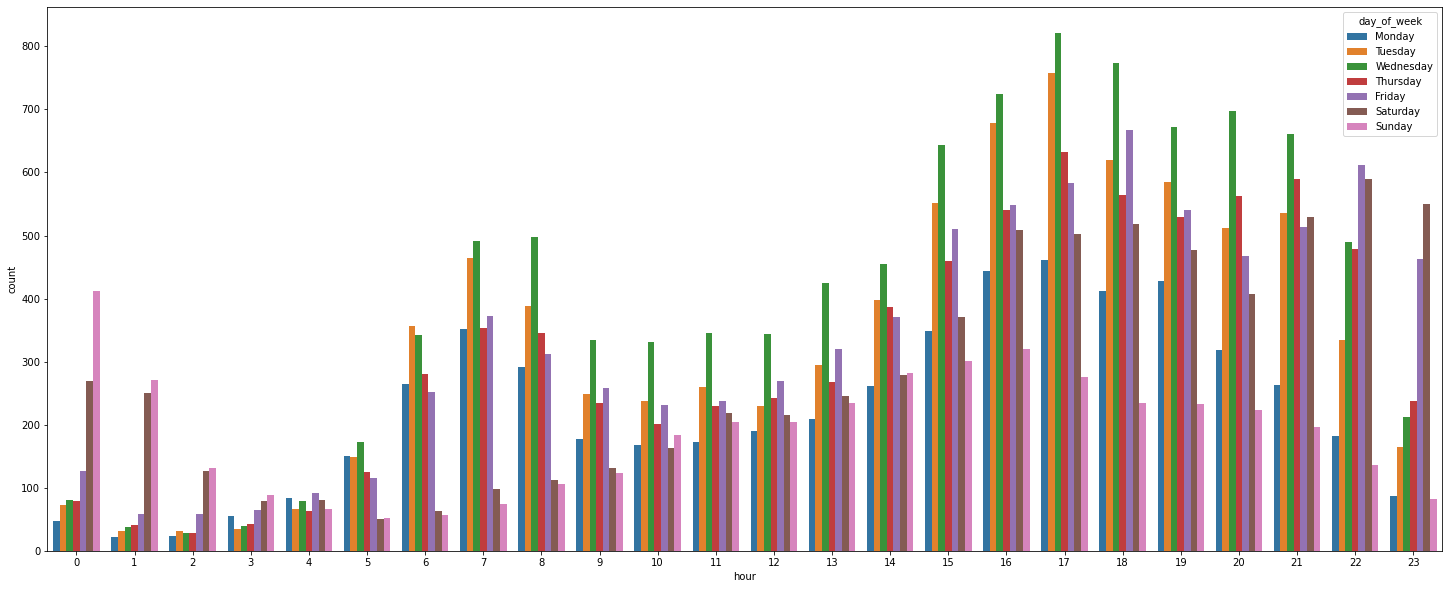

In [20]:
fig, ax = plt.subplots(figsize=(25,10))
ax = sns.countplot(x=dataset.sort_values('day_of_week', ascending = True).reset_index()['hour'], 
                   hue=dataset.sort_values('day_of_week', ascending = True).reset_index()['day_of_week'].map(dict_days))
fig.show()

In [21]:
# Scatter mapbox of all the data according to the day of week

fig = px.scatter_mapbox(dataset.sort_values('day_of_week', ascending = True).reset_index(), 
                        lat="Lat", 
                        lon="Lon", 
                        color=dataset.sort_values('day_of_week', ascending = True).reset_index()['day_of_week'].map(dict_days), 
                        mapbox_style="carto-positron")
fig.show()

In [22]:
## Animated scatter mapbox of all data according to the day
fig = px.scatter_mapbox(dataset.sort_values('day_of_week', ascending = True).reset_index(),
                        lat="Lat",
                        lon="Lon",
                        animation_frame = dataset.sort_values('day_of_week', ascending = True).reset_index()['day_of_week'].map(dict_days),
                        animation_group = dataset.sort_values('day_of_week', ascending = True).reset_index()['day_of_week'].map(dict_days),
                        color=dataset.sort_values('day_of_week', ascending = True).reset_index()['day_of_week'].map(dict_days),
                        mapbox_style="carto-positron")
fig.show()

In [23]:
# Scatter mapbox of all data according to the hour

fig = px.scatter_mapbox(dataset.sort_values('hour', ascending = True).reset_index(), 
                        lat="Lat", 
                        lon="Lon", 
                        color=dataset.sort_values('hour', ascending = True).reset_index()['hour'].astype('str'), 
                        mapbox_style="carto-positron")
fig.show()

In [24]:
## Animated scatter mapbox of all data according to the hour
fig = px.scatter_mapbox(dataset.sort_values('hour', ascending = True).reset_index(),
                        lat="Lat",
                        lon="Lon",
                        animation_frame = 'hour',
                        animation_group = 'hour',
                        color=dataset.sort_values('hour', ascending = True).reset_index()['hour'].astype('str'),
                        mapbox_style="carto-positron")
fig.show()

In [25]:
# Define a column where we will store days and hours distinctively
dataset['day_hour']=dataset['day_of_week']+dataset['hour']/100

In [26]:
dataset.head()

,Lat,Lon,day_of_week,hour,day_hour
63031,40.7800,-73.9486,6,5,6.05
100482,40.7495,-73.9917,6,11,6.11
239000,40.7475,-74.0089,5,23,5.23
216098,40.7555,-73.9917,2,20,2.20
160769,40.6450,-73.7819,3,13,3.13


In [27]:
# Try on an example how to transform the day_hour values into an explicit text
a = 1.05
d = dict_days[round(a)]
print(d)
h = str(' at ') + str(round((a-round(a))*100))
print(h)
d + h

Tuesday
 at 5


'Tuesday at 5'

In [28]:
# Define a function that transforms the day_hour column into an explicit text
def str_day_hour(day_hour):
    d = dict_days[round(day_hour)]
    h = str(' at ') + str(round((day_hour-round(day_hour))*100))
    return(d+h)

In [29]:
str_day_hour(0.05)

'Monday at 5'

In [30]:
## Animated scatter mapbox of all data according to the day and the hour
fig = px.scatter_mapbox(dataset.sort_values('day_hour', ascending = True).reset_index(),
                        lat="Lat",
                        lon="Lon",
                        animation_frame = 'day_hour',
                        animation_group = 'day_hour', 
                        color=dataset.sort_values('day_hour', ascending = True).reset_index()['day_hour'].map(str_day_hour),
                        mapbox_style="carto-positron", 
                        zoom=8)
fig.show()

In [31]:
dataset.drop('day_hour', axis=1, inplace=True)

## Part II : Clustering on a sample of data (Wednesday at 17h)

In [32]:
# Define a function that slices the dataset according to the day_of_week and/or the hour
def data_slice(df,day_of_week,hour):
    if day_of_week == None:
        res = df[df['hour']== hour]
    else:
        if  hour == None:
            res = df[df['day_of_week']== day_of_week]
        else:
            res = df[(df['day_of_week']== day_of_week) & (df['hour']== hour)]
    return(res)

In [33]:
# data for Wednesday at 17h
df = data_slice(dataset,2,17)

In [34]:
# Standard scaling
sc = StandardScaler()
X = sc.fit_transform(df)

In [35]:
# Use the Elbow method to find the optimal number of clusters

wcss =  []
k = []
for i in range (2,15): 
    kmeans = KMeans(n_clusters= i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    k.append(i)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))

WCSS for K=2 --> 1185.4047415020182
WCSS for K=3 --> 850.7732869332509
WCSS for K=4 --> 663.8523705305597
WCSS for K=5 --> 506.4677546394472
WCSS for K=6 --> 411.5037041849122
WCSS for K=7 --> 342.54012509324934
WCSS for K=8 --> 283.8668671639068
WCSS for K=9 --> 236.81647539448142
WCSS for K=10 --> 194.01880471591264
WCSS for K=11 --> 160.4278761413673
WCSS for K=12 --> 144.1363582447474
WCSS for K=13 --> 129.813845014056
WCSS for K=14 --> 120.12528331068046


In [36]:
# Create DataFrame
wcss_frame = pd.DataFrame(wcss)
k_frame = pd.Series(k)

# Create figure
fig= px.line(
    wcss_frame,
    x=k_frame,
    y=wcss_frame.iloc[:,-1]
)

# Create title and axis labels
fig.update_layout(
    yaxis_title="Inertia",
    xaxis_title="# Clusters",
    title="Inertia per cluster"
)

fig.show()

In [37]:
# Use the silhouette method to see if we can refine our hypothesis for k clusters

# Computer mean silhouette score
sil = []
k = []

#We need to start at i=2 as silhouette score cannot accept less than 2 labels 
for i in range (2,15): 
    kmeans = KMeans(n_clusters= i, random_state = 0)
    kmeans.fit(X)
    sil.append(silhouette_score(X, kmeans.predict(X)))
    k.append(i)
    print("Silhouette score for K={} is {}".format(i, sil[-1]))

Silhouette score for K=2 is 0.42457394771387047
Silhouette score for K=3 is 0.4488094134782902
Silhouette score for K=4 is 0.47554514080666593
Silhouette score for K=5 is 0.48043221153519416
Silhouette score for K=6 is 0.39837307058712296
Silhouette score for K=7 is 0.40416100501616503
Silhouette score for K=8 is 0.4140048858208073
Silhouette score for K=9 is 0.41983284203810667
Silhouette score for K=10 is 0.42627489940326313
Silhouette score for K=11 is 0.43554974042950484
Silhouette score for K=12 is 0.40238900293270835
Silhouette score for K=13 is 0.4145851667095628
Silhouette score for K=14 is 0.36846151676781896


In [38]:
# Create a data frame 
cluster_scores=pd.DataFrame(sil)
k_frame = pd.Series(k)

# Create figure
fig = px.bar(data_frame=cluster_scores,  
             x=k, 
             y=cluster_scores.iloc[:, -1]
            )

# Add title and axis labels
fig.update_layout(
    yaxis_title="Silhouette Score",
    xaxis_title="Clusters",
    title="Silhouette Score per cluster"
)

fig.show()

### Clustering with KMeans and DBscan

In [39]:
# Define a fuction that makes KMeans clustering and plots the clusters
def clustering_kmeans_viz(data, n_clusters):
    sc = StandardScaler()
    X = sc.fit_transform(data)
    kmeans = KMeans(n_clusters= n_clusters)
    kmeans.fit(X)
    data["cluster_kmeans"] = kmeans.labels_
    data["cluster_kmeans"] = data["cluster_kmeans"].astype(str)
    fig = px.scatter_mapbox(data,
                        lat="Lat",
                        lon="Lon",
                        color="cluster_kmeans",
                        mapbox_style="carto-positron",
                        zoom=10)
    fig.show()

In [40]:
# Define a fuction that makes DBscan clustering and plots the clusters
def clustering_dbscan_viz(data, eps, min_samples, metric):
    sc = StandardScaler()
    X = sc.fit_transform(data)
    db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    db.fit(X)
    data["cluster_dbscan"] = db.labels_
    data = data[data['cluster_dbscan'] >= 0]
    data["cluster_dbscan"] = data["cluster_dbscan"].astype(str)
    fig = px.scatter_mapbox(data,
                        lat="Lat",
                        lon="Lon",
                        color="cluster_dbscan",
                        mapbox_style="carto-positron",
                        zoom=10)
    fig.show()

In [41]:
data = data_slice(dataset,2,17)

#### a. Clustering with KMeans

In [42]:
clustering_kmeans_viz(data, 5)

#### b. Clustering with DBscan

In [43]:
clustering_dbscan_viz(data, 0.2, 20, 'manhattan')

In [44]:
clustering_dbscan_viz(data, 0.2, 30, 'manhattan')

## Part III : Clustering generalized to Wednesday any time

In [45]:
data = data_slice(dataset,2,None)

In [46]:
clustering_dbscan_viz(data, 0.2, 30, 'manhattan')

## Part IV : Clustering generalized to the whole dataset

In [47]:
# Define a function that makes the clustering and returns the dataset with the clusters, the number of clusterns and the number of outliers
def clustering_dbscan(data, eps, min_samples, metric):
    sc = StandardScaler()
    X = sc.fit_transform(data)
    db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    db.fit(X)
    data["cluster_dbscan"] = db.labels_
    data["cluster_dbscan"] = data["cluster_dbscan"].astype(str)
    nb_clusters = np.unique(db.labels_).shape[0]
    nb_outliers = -sum([0 if i!=-1 else i for i in db.labels_])
    return(data,nb_clusters, nb_outliers)

### 1. Clustering day by day with the same DBscan hyper parameters

In [48]:
# DBscan for all days with esp=0.2 and min_samples=30
clus = []
clus_df = []
for i in range(7):
    data = data_slice(dataset,i,None)
    res = clustering_dbscan(data,0.2,30,"manhattan")
    clus.append((i,data.shape[0],res[1]-1,res[2],round(res[2]/data.shape[0]*100,1)))
    clus_df = res[0]
pd.DataFrame(clus, columns=['day', 'Nb_rows', 'nb_clusters','nb_outliers','percentage_outliers'])

,day,Nb_rows,nb_clusters,nb_outliers,percentage_outliers
0,0,5413,3,3636,67.2
1,1,7997,4,4461,55.8
2,2,9701,9,4752,49.0
3,3,7517,2,4404,58.6
4,4,8045,3,4673,58.1
5,5,6834,5,3823,55.9
6,6,4493,4,3824,85.1


In [49]:
# DBscan for all days with esp=0.22 and min_samples=40
clus = []
clus_df = []
for i in range(7):
    data = data_slice(dataset,i,None)
    res = clustering_dbscan(data,0.22,40,"manhattan")
    clus.append((i,data.shape[0],res[1]-1,res[2],round(res[2]/data.shape[0]*100,1)))
    clus_df.append(res[0])
pd.DataFrame(clus, columns=['day', 'Nb_rows', 'nb_clusters','nb_outliers','percentage_outliers'])

,day,Nb_rows,nb_clusters,nb_outliers,percentage_outliers
0,0,5413,2,3716,68.6
1,1,7997,2,4708,58.9
2,2,9701,3,5085,52.4
3,3,7517,2,4509,60.0
4,4,8045,4,4787,59.5
5,5,6834,4,3931,57.5
6,6,4493,2,3895,86.7


#### Monday

In [50]:
day = 0
data = data_slice(dataset,day,None)
print('Clusters for {}'.format(dict_days[day]))
clustering_dbscan_viz(data, 0.22, 40, 'manhattan')

Clusters for Monday


#### Tuesday

In [51]:
day = 1
data = data_slice(dataset,day,None)
print('Clusters for {}'.format(dict_days[day]))
clustering_dbscan_viz(data, 0.22, 40, 'manhattan')

Clusters for Tuesday


#### Wednesday

In [52]:
day = 2
data = data_slice(dataset,day,None)
print('Clusters for {}'.format(dict_days[day]))
clustering_dbscan_viz(data, 0.22, 40, 'manhattan')

Clusters for Wednesday


#### Thursday

In [53]:
day = 3
data = data_slice(dataset,day,None)
print('Clusters for {}'.format(dict_days[day]))
clustering_dbscan_viz(data, 0.22, 40, 'manhattan')

Clusters for Thursday


#### Friday

In [54]:
day = 4
data = data_slice(dataset,day,None)
print('Clusters for {}'.format(dict_days[day]))
clustering_dbscan_viz(data, 0.22, 40, 'manhattan')

Clusters for Friday


#### Saturday

In [55]:
day = 5
data = data_slice(dataset,day,None)
print('Clusters for {}'.format(dict_days[day]))
clustering_dbscan_viz(data, 0.22, 40, 'manhattan')

Clusters for Saturday


#### Sunday

In [56]:
day = 6
data = data_slice(dataset,day,None)
print('Clusters for {}'.format(dict_days[day]))
clustering_dbscan_viz(data, 0.22, 40, 'manhattan')

Clusters for Sunday


### 2. Clustering day by day with different DBscan hyper parameters to have 4/5 clusters per day

#### Monday

In [57]:
day = 0
data = data_slice(dataset,day,None)
print('Clusters for {}'.format(dict_days[day]))
clustering_dbscan_viz(data, 0.2, 30, 'manhattan')

Clusters for Monday


#### Tuesday

In [58]:
day = 1
data = data_slice(dataset,day,None)
print('Clusters for {}'.format(dict_days[day]))
clustering_dbscan_viz(data, 0.2, 30, 'manhattan')

Clusters for Tuesday


#### Wednesday

In [59]:
day = 2
data = data_slice(dataset,day,None)
print('Clusters for {}'.format(dict_days[day]))
clustering_dbscan_viz(data, 0.2, 40, 'manhattan')

Clusters for Wednesday


#### Thursday

In [60]:
day = 3
data = data_slice(dataset,day,None)
print('Clusters for {}'.format(dict_days[day]))
clustering_dbscan_viz(data, 0.2, 50, 'manhattan')

Clusters for Thursday


#### Friday

In [61]:
day = 4
data = data_slice(dataset,day,None)
print('Clusters for {}'.format(dict_days[day]))
clustering_dbscan_viz(data, 0.2, 40, 'manhattan')

Clusters for Friday


#### Saturday

In [62]:
day = 5
data = data_slice(dataset,day,None)
print('Clusters for {}'.format(dict_days[day]))
clustering_dbscan_viz(data, 0.2, 55, 'manhattan')

Clusters for Saturday


#### Sunday

In [63]:
day = 6
data = data_slice(dataset,day,None)
print('Clusters for {}'.format(dict_days[day]))
clustering_dbscan_viz(data, 0.2, 30, 'manhattan')

Clusters for Sunday


### 3. Clustering on the whole dataset then separate day per day

#### a. DBscan with eps=0.22 and min_sample=40

In [64]:
# DBscan on the whole dataset
res = clustering_dbscan(dataset,0.22,40,"manhattan")
data = res[0]
data = data[data['cluster_dbscan'] != '-1']
data['day_name']= data['day_of_week'].map(dict_days)

In [65]:
pd.DataFrame([[res[1],res[2],round(res[2]/dataset.shape[0]*100,1)]], columns=['nb_clusters','nb_outliers','percentage_outliers'])

,nb_clusters,nb_outliers,percentage_outliers
0,27,29603,59.2


In [66]:
# Scatter mapbox of all clusters

fig = px.scatter_mapbox(data,
                        lat="Lat",
                        lon="Lon",
                        color="cluster_dbscan",
                        mapbox_style="carto-positron",
                        zoom=10)
fig.show()

In [67]:
# Scatter mapbox for a specific day (here day 5) 
## The aim here is to fix the day to make a 3D plot with hours, lat and lon

fig = px.scatter_mapbox(data[data['day_of_week']==5],
                        lat="Lat",
                        lon="Lon",
                        color="cluster_dbscan",
                        mapbox_style="carto-positron",
                        zoom=10)
fig.show()

In [68]:
# 3D scatter plot for day 5 to show that even if the clusters overlap on the map , they are distinct in a 3D vision.

fig = px.scatter_3d(data[data['day_of_week']==5], x='Lat', y='Lon', z='hour',
              color='cluster_dbscan')
fig.show()

In [69]:
# Scatter mapbox for a specific hour (here 21h) 
## The aim here is to fix the hour to make a 3D plot with days, lat and lon
fig = px.scatter_mapbox(data[data['hour']==21],
                        lat="Lat",
                        lon="Lon",
                        color="cluster_dbscan",
                        mapbox_style="carto-positron",
                        zoom=10)
fig.show()

In [70]:
# 3D scatter plot for hour 21h to show that even if the clusters overlap on the map , they are distinct in a 3D vision.
fig = px.scatter_3d(data[data['hour']==21], x='Lat', y='Lon', z='day_of_week',
              color='cluster_dbscan')
fig.show()

In [71]:
# Animated map of the clusters for each day of the week
fig = px.scatter_mapbox(data,
                        lat="Lat",
                        lon="Lon",
                        animation_frame = 'day_name',
                        animation_group = 'day_name', 
                        category_orders={"day_name": ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']},
                        color="cluster_dbscan",
                        mapbox_style="carto-positron", 
                        zoom=10)
fig.show()

In [72]:
# Animated map of the clusters for each hour
fig = px.scatter_mapbox(data,
                        lat="Lat",
                        lon="Lon",
                        animation_frame = 'hour',
                        animation_group = 'hour', 
                        category_orders={"hour": list(range(24))},
                        color="cluster_dbscan",
                        mapbox_style="carto-positron", 
                        zoom=10)
fig.show()

In [73]:
# Define a column where we will store days and hours distinctively
data['day_hour']=data['day_of_week']+data['hour']/100

In [74]:
## Animated scatter mapbox of all data according to the day and the hour
fig = px.scatter_mapbox(data.sort_values('day_hour', ascending = True).reset_index(),
                        lat="Lat",
                        lon="Lon",
                        animation_frame = data.sort_values('day_hour', ascending = True).reset_index()['day_hour'].map(str_day_hour),
                        animation_group = 'day_hour',
                        color='cluster_dbscan',
                        mapbox_style="carto-positron", 
                        zoom=10)
fig.show()

#### b. Clustering with different hyper parameters to visualize the impact of hyper parameters variations

##### Higher density clusters : DBscan with eps=0.15 and min_sample=40

In [75]:
# DBscan on the whole dataset
res = clustering_dbscan(dataset,0.15,40,"manhattan")
data = res[0]
data = data[data['cluster_dbscan'] != '-1']
data['day_name']= data['day_of_week'].map(dict_days)
data['day_hour']=data['day_of_week']+data['hour']/100
pd.DataFrame([[res[1],res[2],round(res[2]/dataset.shape[0]*100,1)]], columns=['nb_clusters','nb_outliers','percentage_outliers'])

,nb_clusters,nb_outliers,percentage_outliers
0,59,43227,86.5


In [76]:
## Animated scatter mapbox of all data according to the day and the hour
fig = px.scatter_mapbox(data.sort_values('day_hour', ascending = True).reset_index(),
                        lat="Lat",
                        lon="Lon",
                        animation_frame = data.sort_values('day_hour', ascending = True).reset_index()['day_hour'].map(str_day_hour),
                        animation_group = 'day_hour',
                        color='cluster_dbscan',
                        mapbox_style="carto-positron", 
                        zoom=10)
fig.show()

In [77]:
# DBscan on the whole dataset
res = clustering_dbscan(dataset,0.22,25,"manhattan")
data = res[0]
data = data[data['cluster_dbscan'] != '-1']
data['day_name']= data['day_of_week'].map(dict_days)
data['day_hour']=data['day_of_week']+data['hour']/100
pd.DataFrame([[res[1],res[2],round(res[2]/dataset.shape[0]*100,1)]], columns=['nb_clusters','nb_outliers','percentage_outliers'])

,nb_clusters,nb_outliers,percentage_outliers
0,120,22462,44.9


In [78]:
## Animated scatter mapbox of all data according to the day and the hour
fig = px.scatter_mapbox(data.sort_values('day_hour', ascending = True).reset_index(),
                        lat="Lat",
                        lon="Lon",
                        animation_frame = data.sort_values('day_hour', ascending = True).reset_index()['day_hour'].map(str_day_hour),
                        animation_group = 'day_hour',
                        color='cluster_dbscan',
                        mapbox_style="carto-positron", 
                        zoom=10)
fig.show()